# Transformaciones de Variables en el Dataset House Prices

En esta actividad, aplicaremos transformaciones logarítmicas, polinómicas y técnicas de escalado para mejorar la distribución de las variables y el rendimiento de un modelo predictivo.

In [1]:

# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set(style='whitegrid')


## 1. Carga y Exploración de Datos

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

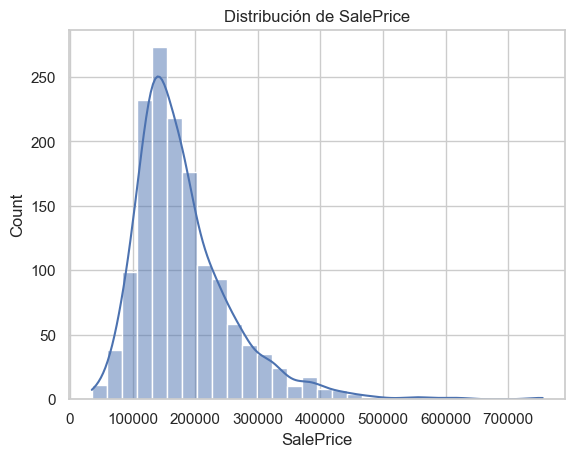

In [2]:

# Cargar los datos
train_data = pd.read_csv('data/train2.csv')

# Mostrar las primeras filas
print(train_data.head())

# Información general del dataset
print(train_data.info())

# Resumen estadístico
print(train_data.describe())

# Visualizar la distribución de la variable objetivo
sns.histplot(train_data['SalePrice'], kde=True, bins=30)
plt.title('Distribución de SalePrice')
plt.xlabel('SalePrice')
plt.show()


## 2. Preprocesamiento de Datos

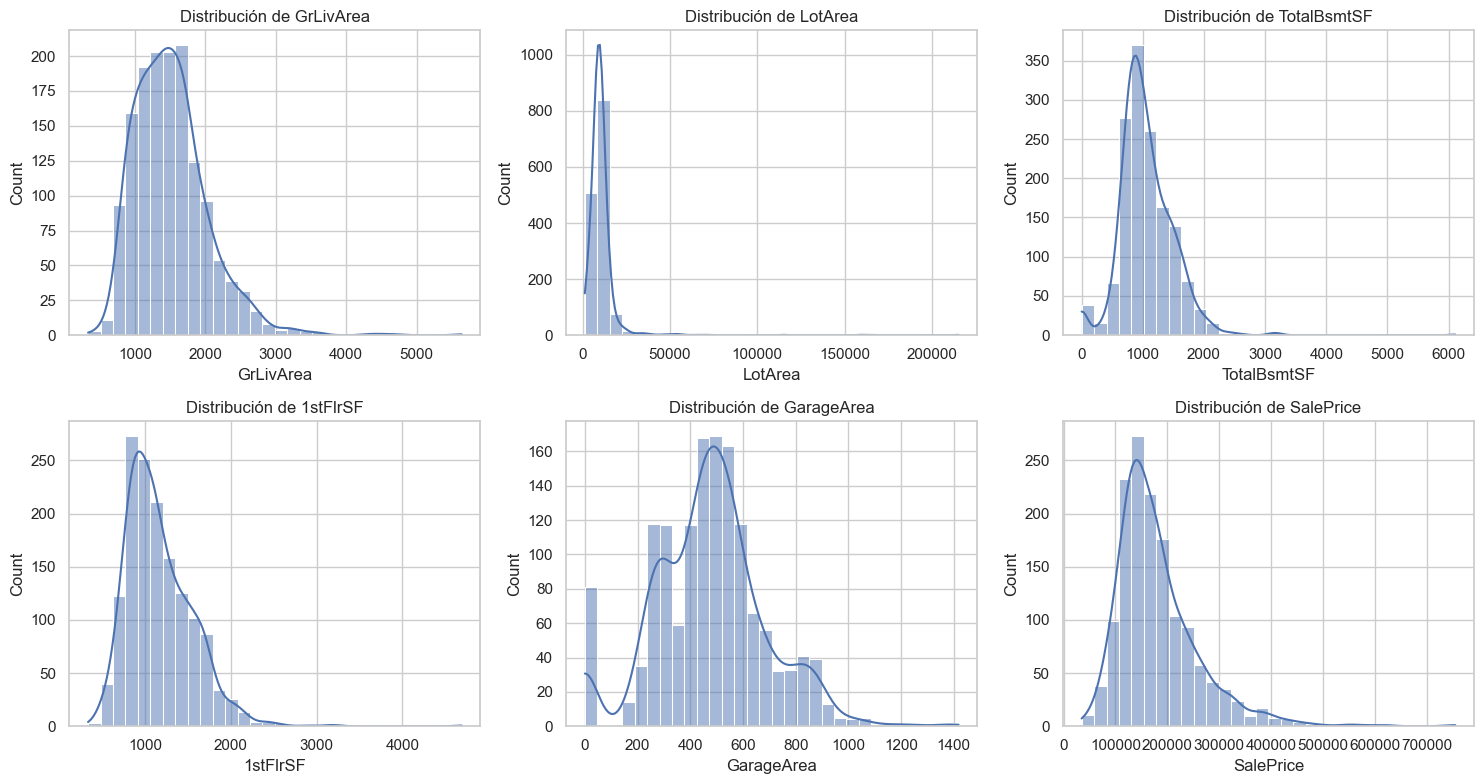

In [3]:

# Imputar valores faltantes en variables numéricas con la mediana
num_features = train_data.select_dtypes(include=[np.number]).columns
train_data[num_features] = train_data[num_features].fillna(train_data[num_features].median())

# Seleccionar variables numéricas para aplicar transformaciones
numeric_cols = ['GrLivArea', 'LotArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'SalePrice']
data = train_data[numeric_cols]

# Visualizar la distribución de las variables seleccionadas
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for col, ax in zip(numeric_cols, axes.flatten()):
    sns.histplot(data[col], kde=True, bins=30, ax=ax)
    ax.set_title(f'Distribución de {col}')
plt.tight_layout()
plt.show()


## 3. Transformaciones de Variables

In [4]:

# Aplicar transformaciones logarítmicas a variables sesgadas
data['GrLivArea_log'] = np.log1p(data['GrLivArea'])
data['SalePrice_log'] = np.log1p(data['SalePrice'])

# Crear variables polinómicas
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(data[['GrLivArea', 'LotArea']])
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['GrLivArea', 'LotArea']))

# Escalar las variables numéricas
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['TotalBsmtSF', '1stFlrSF', 'GarageArea']])
scaled_df = pd.DataFrame(scaled_features, columns=['TotalBsmtSF_scaled', '1stFlrSF_scaled', 'GarageArea_scaled'])

# Combinar las transformaciones
transformed_data = pd.concat([data[['SalePrice_log']], poly_features_df, scaled_df], axis=1)


/var/folders/5d/7gh47wqd111dyfvyv6wz8xtw0000gn/T/ipykernel_27011/1544309274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['GrLivArea_log'] = np.log1p(data['GrLivArea'])
/var/folders/5d/7gh47wqd111dyfvyv6wz8xtw0000gn/T/ipykernel_27011/1544309274.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SalePrice_log'] = np.log1p(data['SalePrice'])


## 4. Modelado y Evaluación

In [5]:

# Separar características y variable objetivo
X = transformed_data.drop(columns=['SalePrice_log'])
y = transformed_data['SalePrice_log']

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar un modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicción y evaluación
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")


RMSE: 0.2228
R-squared: 0.7340


## 5. Interpretación de Resultados

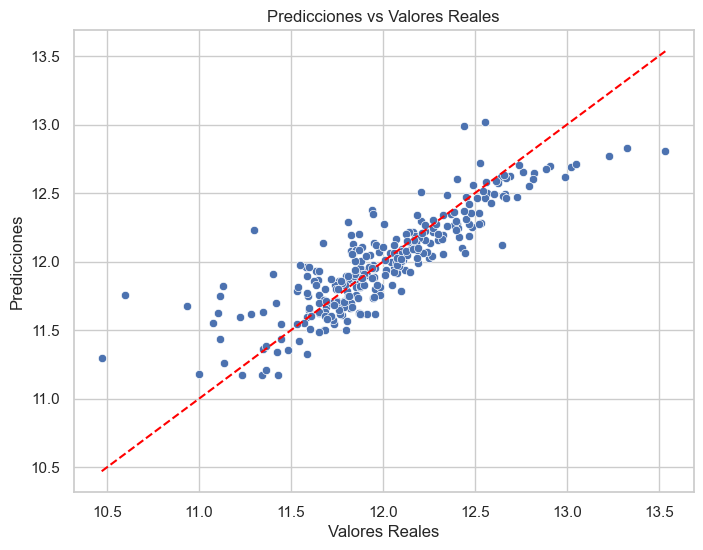

In [6]:

# Visualizar las predicciones vs valores reales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()


## Conclusión

Las transformaciones aplicadas mejoraron la distribución de las variables y permitieron capturar relaciones más complejas, lo cual se reflejó en un mejor rendimiento del modelo.